<a href="https://colab.research.google.com/github/JMML2021/Tasca-M5-T01-Exercicis-d-Hipotesis-Testing./blob/main/Tasca_M5_T01_Exercicis_d'Hipotesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exercicis d'Hipotesis Testing.**



## Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [ ]:
+

State your research hypothesis as a null hypothesis and alternate hypothesis (Ho) and (Ha or H1).
Collect data in a way designed to test the hypothesis.
Perform an appropriate statistical test.
Decide whether to reject or fail to reject your null hypothesis.
Present the findings in your results and discussion section.

https://www.scribbr.com/statistics/hypothesis-testing/

In [ ]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd

In [16]:
# Abro el fichero una vez adecuado

#path='https://drive.google.com/file/d/1j8WdhTxMpngrUigfcfrJynng-9JHo9xa/view?usp=sharing'
path = ('/content/drive/MyDrive/01_COLAB/Lligues europees UEFA.csv')
#data = pd.read_csv(file,
    
df=  pd.read_csv(path, sep=';', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
df1.iloc[0]

Hay  98 filas con 21 columnas


Rk                                    1
Squad                   Manchester City
Country                             ENG
LgRk                                  1
MP                                   37
W                                    28
D                                     6
L                                     3
GF                                   96
GA                                   24
GD                                   72
Pts                                  90
Pts/G                              2.43
xG                                 86.1
xGA                                26.8
xGD                                59.3
xGD/90                              1.6
Last 5                        W W W W D
Attendance                        52739
Top Team Scorer    Kevin De Bruyne - 15
Goalkeeper                      Ederson
Name: 0, dtype: object

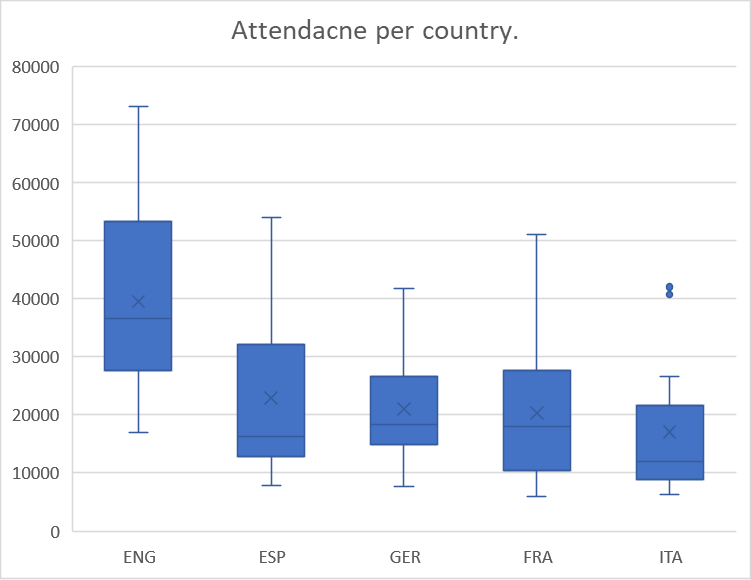

In [20]:
df1.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


APIS
https://github.com/aina1997/MasterClassDS/blob/main/API_Python/API_Rest_%2B_Python.ipynb